# IF3070 Foundations of Artificial Intelligence | Tugas Kecil 2

Group Number: 64

Group Members:
- Nathaniel Liady (18222114)
- Gabriel Marcellino (18222115)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np

# Import other libraries if needed
import seaborn as sns
import matplotlib.pyplot as plt


# Additional settings
pd.set_option('display.max_columns',None)

## Import Dataset

In [2]:
# Example of reading a csv file from a gdrive link

# Take the file id from the gdrive file url
# https://drive.google.com/file/d/1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU/view?usp=sharing => The file id is 1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU
# and then put it in this format:
# https://drive.google.com/uc?id={file_id}
# Don't forget to change the access to public

# # Example
# df = pd.read_csv('https://drive.google.com/uc?id=1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU')
# df.head()

df = pd.read_csv('https://drive.google.com/uc?id=15pnRBoG8nJRxJx3Bp8tOneZEB1XmHCYe')
# df = pd.read_csv('train.csv')


In [3]:
df.head(10)

,id,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,Title,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,1,NaN,https://www.northcm.ac.th,24.0,www.northcm.ac.th,17.0,0.0,NaN,0.800000,NaN,NaN,NaN,2.0,0.0,NaN,0.0,NaN,0.417,0.0,0.000,0.0,0.0,0.0,2.0,0.083,NaN,NaN,457.0,NaN,norhcmac,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,5.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,1.0,NaN,3.0,NaN,69.0,NaN,NaN,1
1,4,8135291.txt,http://uqr.to/1il1z,NaN,NaN,NaN,NaN,to,1.000000,0.000896,0.036850,2.0,0.0,NaN,0.0,NaN,8.0,0.421,2.0,0.105,NaN,NaN,0.0,2.0,NaN,NaN,9.0,NaN,1.0,NaN,NaN,100.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,0
2,5,586561.txt,https://www.woolworthsrewards.com.au,35.0,www.woolworthsrewards.com.au,28.0,0.0,au,0.857143,NaN,0.060894,NaN,2.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,woolworthsrewrdscom,0.0,0.0,1.0,0.0,1.0,NaN,1.0,NaN,0.0,3.0,0.0,NaN,NaN,1.0,1.0,1.0,1.0,0.0,1.0,33.0,7.0,8.0,15.0,NaN,2.0,1
3,6,NaN,NaN,31.0,NaN,NaN,NaN,com,0.562500,0.522907,0.055829,NaN,1.0,NaN,0.0,NaN,17.0,NaN,0.0,0.000,NaN,0.0,0.0,NaN,0.065,NaN,NaN,5062.0,NaN,NaN,100.0,100.0,NaN,0.0,NaN,0.0,0.0,0.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,24.0,5.0,14.0,NaN,NaN,NaN,1
4,11,412632.txt,NaN,NaN,www.nyprowrestling.com,22.0,0.0,NaN,1.000000,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,0.000,NaN,0.0,NaN,1.0,0.034,1.0,766.0,NaN,NaN,nyprowrestling,100.0,100.0,1.0,1.0,NaN,0.0,NaN,1.0,0.0,0.0,NaN,1.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,14.0,NaN,0.0,NaN,1
5,12,899992.txt,https://www.free-marine.com,26.0,NaN,19.0,NaN,com,0.636364,NaN,0.070574,3.0,1.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,0.077,NaN,240.0,NaN,1.0,NaN,100.0,100.0,NaN,NaN,1.0,0.0,NaN,1.0,0.0,NaN,NaN,NaN,1.0,0.0,0.0,NaN,NaN,0.0,0.0,15.0,3.0,2.0,4.0,1.0,NaN,1
6,17,NaN,https://www.ridemcts.com,23.0,www.ridemcts.com,16.0,0.0,com,NaN,0.522907,NaN,3.0,1.0,NaN,NaN,0.0,10.0,0.435,NaN,0.000,NaN,0.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,100.0,100.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,NaN,NaN,1.0,NaN,1.0,0.0,NaN,1.0,0.0,1.0,NaN,NaN,22.0,NaN,4.0,8.0,1
7,19,568276.txt,https://www.epner.com,NaN,NaN,NaN,0.0,com,NaN,0.522907,0.071276,3.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.000,NaN,NaN,0.0,NaN,0.050,1.0,1266.0,9381.0,1.0,epner,100.0,100.0,1.0,NaN,1.0,NaN,0.0,0.0,0.0,0.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,40.0,NaN,19.0,176.0,NaN,144.0,1
8,20,52998.txt,https://www.az511.com,NaN,www.az511.com,13.0,0.0,com,1.000000,NaN,0.038131,3.0,NaN,0.0,0.0,NaN,NaN,NaN,3.0,0.150,0.0,NaN,0.0,1.0,0.050,NaN,NaN,1080.0,NaN,az511,NaN,100.0,1.0,0.0,NaN,0.0,0.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,33.0,9.0,109.0,7.0,NaN,1
9,22,NaN,https://www.screenbeam.com,25.0,www.screenbeam.com,18.0,NaN,NaN,1.000000,0.522907,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,0.0,1.0,0.040,1.0,2433.0,NaN,1.0,screenbeam,100.0,100.0,NaN,NaN,1.0,NaN,NaN,1.0,2.0,5.0,0.0,NaN,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,27.0,48.0,148.0,11.0,NaN,1


In [4]:
df_copy = df.copy()

# Additional Step

## 1. Change Format Type

There are some incorrect data type (boolean but it says float). So in here, we'll change to desired data type

In [5]:
# See all columns
df_copy.columns

Index(['id', 'FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength',
       'IsDomainIP', 'TLD', 'CharContinuationRate', 'TLDLegitimateProb',
       'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation',
       'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL',
       'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL',
       'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL',
       'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS',
       'LineOfCode', 'LargestLineLength', 'HasTitle', 'Title',
       'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots',
       'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription',
       'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet',
       'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay',
       'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS',
       'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'label'],

In [6]:


bool_columns = [
    'IsDomainIP','HasObfuscation','IsHTTPS','HasTitle','HasFavicon','IsResponsive','HasDescription','Robots','HasHiddenFields','HasPasswordField',
    'HasExternalFormSubmit','HasSocialNet','HasSubmitButton','HasCopyrightInfo','Crypto','Pay','Bank'
    ]

df_copy[bool_columns]

,IsDomainIP,HasObfuscation,IsHTTPS,HasTitle,HasFavicon,IsResponsive,HasDescription,Robots,HasHiddenFields,HasPasswordField,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasCopyrightInfo,Crypto,Pay,Bank
0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN
1,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN
2,0.0,NaN,NaN,1.0,1.0,1.0,NaN,0.0,1.0,1.0,0.0,NaN,NaN,1.0,0.0,1.0,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0
4,0.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,0.0,0.0,NaN,1.0,NaN,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140399,0.0,0.0,NaN,1.0,NaN,1.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,1.0,0.0,NaN,0.0
140400,0.0,0.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,0.0,1.0,1.0,1.0,NaN,1.0,1.0
140401,NaN,0.0,NaN,1.0,0.0,1.0,1.0,1.0,NaN,0.0,0.0,1.0,NaN,1.0,0.0,0.0,0.0
140402,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0


In [7]:
# Before change
df_copy[bool_columns].dtypes

,0
IsDomainIP,float64
HasObfuscation,float64
IsHTTPS,float64
HasTitle,float64
HasFavicon,float64
IsResponsive,float64
HasDescription,float64
Robots,float64
HasHiddenFields,float64
HasPasswordField,float64


In [8]:
# Change the value to boolean but keep the missing values
def change_bool(value):
    if pd.isna(value):
        return value
    else:
        return bool(value)

for column in bool_columns:
    df_copy[column] = df_copy[column].apply(change_bool).astype('bool')

In [9]:
# After Change
df_copy.dtypes

,0
id,int64
FILENAME,object
URL,object
URLLength,float64
Domain,object
DomainLength,float64
IsDomainIP,bool
TLD,object
CharContinuationRate,float64
TLDLegitimateProb,float64


In [10]:
df = df_copy.copy()

# 1. Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

## A. Data Understanding
The objective of this section is for participants to understand the quality of the provided data. This includes:

1. Data Size
2. Statistics of Each Feature
3. Outliers
4. Correlation
5. Distribution

### Step 1

Find the following:

1. The size of the data (instances and features).
2. The data types of each feature.
3. The number of unique values for categorical features.
4. The minimum, maximum, mean, median, and standard deviation values for non-categorical features.
5. Explain the significance of gathering the first four pieces of information.

#### 1. Data Size

In [11]:
# data size
print(f"data row: {df.shape[0]} rows")
print(f"data column: {df.shape[1]} columns")

data row: 140404 rows
data column: 56 columns


In [12]:
# columns
df.columns

Index(['id', 'FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength',
       'IsDomainIP', 'TLD', 'CharContinuationRate', 'TLDLegitimateProb',
       'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation',
       'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL',
       'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL',
       'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL',
       'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS',
       'LineOfCode', 'LargestLineLength', 'HasTitle', 'Title',
       'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots',
       'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription',
       'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet',
       'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay',
       'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS',
       'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'label'],

#### 2. Data Types

In [13]:
# data types of each feature
df.dtypes

,0
id,int64
FILENAME,object
URL,object
URLLength,float64
Domain,object
DomainLength,float64
IsDomainIP,bool
TLD,object
CharContinuationRate,float64
TLDLegitimateProb,float64


#### 3. Unique Values

In [14]:
# the number of unique values

df_copy.nunique().sort_values(ascending=True)

,0
label,2
HasTitle,2
HasFavicon,2
Robots,2
IsResponsive,2
NoOfURLRedirect,2
NoOfSelfRedirect,2
IsHTTPS,2
HasDescription,2
HasSocialNet,2


#### 4. Statistical Informations

In [15]:
# Statistical Informations

# Take Numerical Categories
num_categories = df.select_dtypes(include='number')

In [16]:
# Numerical Columns
num_categories.columns

Index(['id', 'URLLength', 'DomainLength', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL',
       'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL',
       'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL',
       'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'LineOfCode',
       'LargestLineLength', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'NoOfURLRedirect', 'NoOfSelfRedirect', 'NoOfPopup', 'NoOfiFrame',
       'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef',
       'NoOfExternalRef', 'label'],
      dtype='object')

In [17]:
num_categories.describe()

,id,URLLength,DomainLength,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,LineOfCode,LargestLineLength,DomainTitleMatchScore,URLTitleMatchScore,NoOfURLRedirect,NoOfSelfRedirect,NoOfPopup,NoOfiFrame,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,140404.000000,79765.000000,94085.000000,92362.000000,87531.000000,88333.000000,92673.000000,96344.000000,73606.000000,75806.000000,77066.000000,74658.000000,81594.000000,86896.000000,78826.000000,96303.000000,95017.000000,92775.000000,77570.000000,71251.000000,7.247600e+04,90407.000000,88188.000000,73020.000000,73689.000000,97051.000000,90460.000000,89932.000000,73270.000000,79603.000000,92272.000000,97718.000000,71025.000000,140404.000000
mean,117682.632746,27.701473,19.619387,0.918007,0.277482,0.059286,2.729015,1.161442,0.005951,0.000028,14.125178,0.483299,0.355737,0.006609,0.010238,0.004901,0.003473,1.433350,0.050954,1796.978470,8.283455e+03,70.832896,71.133832,0.121679,0.028756,0.359749,2.508125,41.647489,10.268623,16.461729,104.875900,3.733846,78.104273,0.924831
std,68122.005080,23.140676,5.833808,0.159142,0.248115,0.008063,0.533310,0.445054,1.082855,0.001697,15.905539,0.101771,3.386914,0.033156,0.242953,0.079828,0.241136,2.021879,0.022624,3772.263209,7.490477e+04,45.039128,44.886539,0.326917,0.167121,4.788340,7.815329,102.538702,133.321659,21.001274,219.137035,24.192458,187.106965,0.263664
min,1.000000,14.000000,4.000000,0.000000,0.000000,0.001229,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58689.500000,23.000000,16.000000,0.913043,0.012927,0.055542,2.000000,1.000000,0.000000,0.000000,10.000000,0.409000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.036000,516.000000,7.120000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2.000000,6.000000,24.000000,0.000000,13.000000,1.000000
50%,117421.500000,26.000000,19.000000,1.000000,0.522907,0.060264,3.000000,1.000000,0.000000,0.000000,13.000000,0.483000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.043000,1014.000000,2.681000e+03,100.000000,100.000000,0.000000,0.000000,0.000000,1.000000,23.000000,5.000000,12.000000,69.000000,0.000000,39.000000,1.000000
75%,176724.250000,30.000000,23.000000,1.000000,0.522907,0.064391,3.000000,1.000000,0.000000,0.000000,16.000000,0.552000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.057000,1964.000000,9.381000e+03,100.000000,100.000000,0.000000,0.000000,0.000000,2.000000,45.000000,12.000000,22.000000,132.000000,3.000000,99.000000,1.000000
max,235795.000000,4054.000000,93.000000,1.000000,0.522907,0.088766,13.000000,7.000000,291.000000,0.212000,2997.000000,0.865000,433.000000,0.600000,31.000000,3.000000,52.000000,470.000000,0.270000,440155.000000,1.369832e+07,100.000000,100.000000,1.000000,1.000000,602.000000,1602.000000,8956.000000,35820.000000,2828.000000,26596.000000,4887.000000,27516.000000,1.000000


#### 5. Purposes for doing the 4 steps

- Data Size and Data Types: <br>
    When we know the data size, it can helps us to understand amount of space of the data we are working on. It helps us to distinct proportional when splitting the data. For the data types in each features, it helps us understand which value that can be use in certain analysis (e.g. statistical informations from numerical data type)
 <br>

- Unique Values: <br>
  To understand how much (unique) values in each features. We can identify continuous or categorical data based on amount of unique values each features
<br>

- Statistical Informations: <br>
  It can help on finding statistical semantic each features based on mean, standard deviation (how far the values from the mean), quartile (amount of values under each quartile), min max values. With this informations, we could detect outliers or anomalies on the data ( one example: max in URLLength beyond the 75% quartile,which is 30).

<br>

### Step 2

Find the following:

1. Missing values for each feature.
2. Outliers for each feature (use the methods you are familiar with).
3. Why is it necessary to identify missing values and outliers?

#### 1. Missing Values

percentage missing values from all of the data

In [18]:
missing_percentage = ((df.isna().sum() * 100 / len(df)).round(4))
df_missing_percentage = missing_percentage.to_frame(name='Missing Values (%)').sort_values(by='Missing Values (%)',ascending=True)

print(df_missing_percentage)

                            Missing Values (%)
id                                      0.0000
HasCopyrightInfo                        0.0000
Crypto                                  0.0000
Pay                                     0.0000
Bank                                    0.0000
HasPasswordField                        0.0000
HasHiddenFields                         0.0000
HasSubmitButton                         0.0000
HasSocialNet                            0.0000
HasExternalFormSubmit                   0.0000
HasDescription                          0.0000
IsResponsive                            0.0000
Robots                                  0.0000
HasFavicon                              0.0000
HasTitle                                0.0000
IsHTTPS                                 0.0000
label                                   0.0000
HasObfuscation                          0.0000
IsDomainIP                              0.0000
NoOfEmptyRef                           30.4023
NoOfPopup    

#### 2. Outliers

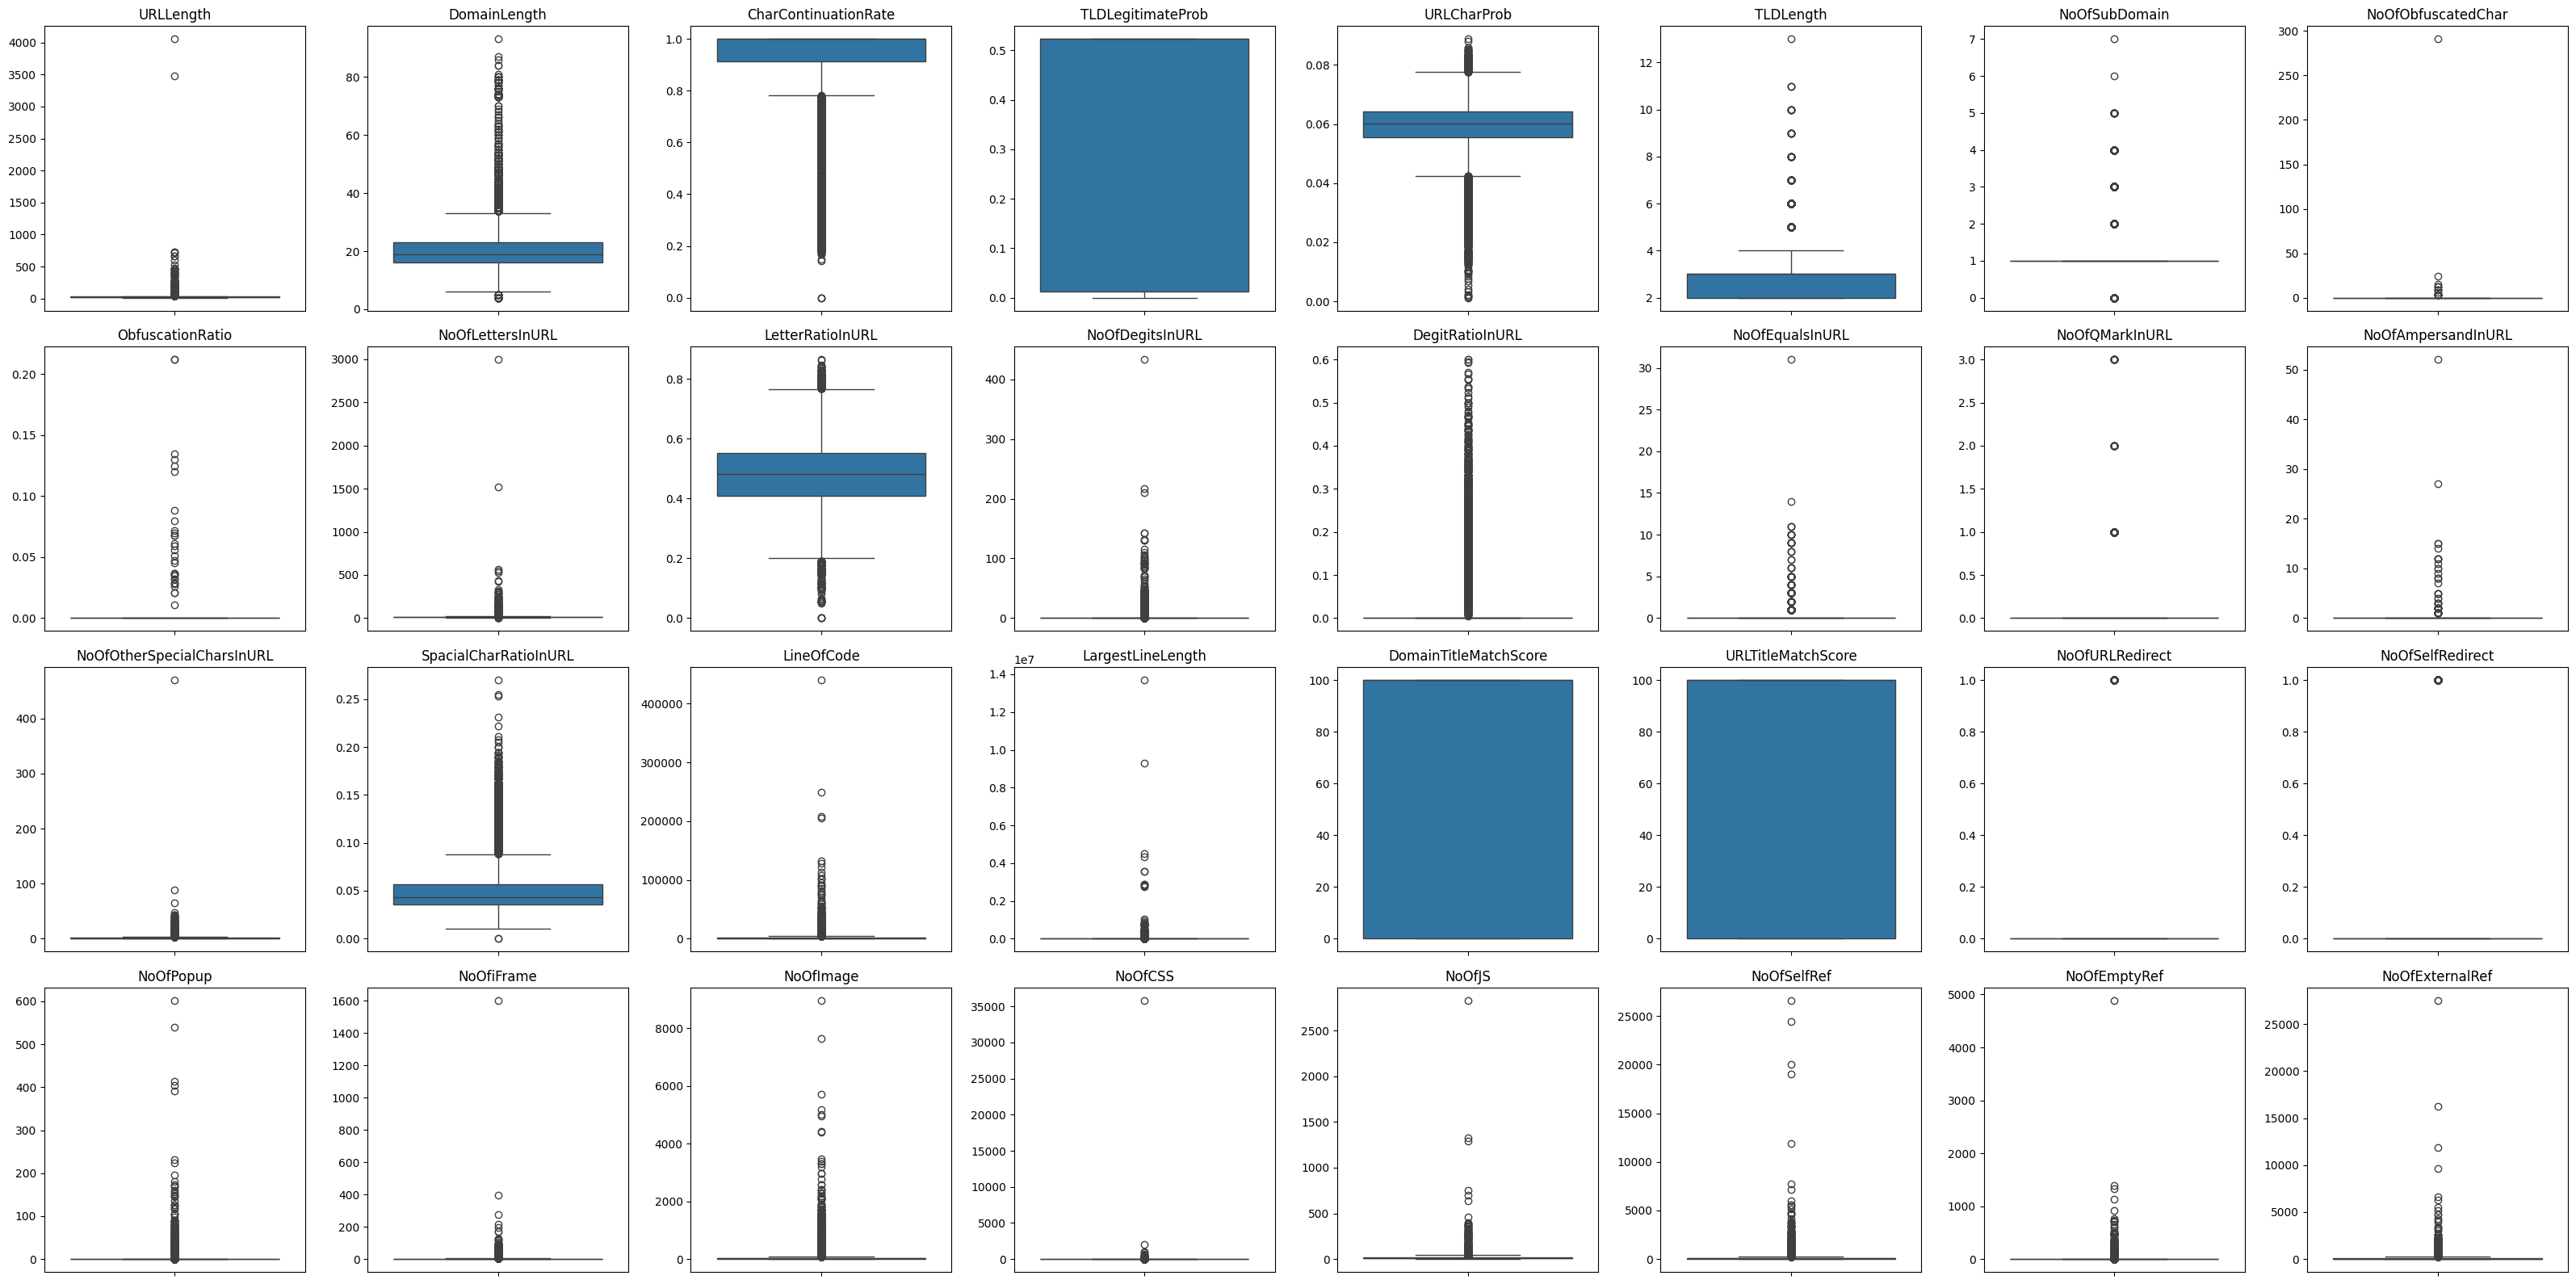

In [19]:
# Outliers plot without id and label
num_categories_exc = num_categories.select_dtypes(exclude='int64')
fig,axs = plt.subplots(ncols=8,nrows=4,figsize=(32,16))
axs = axs.flatten()

for i, col in enumerate(num_categories_exc.columns):
    sns.boxplot(data=df[col], ax=axs[i])
    axs[i].set_title(col)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
plt.tight_layout()
plt.show()

#### 3. Explanation why need to find missing values and outliers

- Missing Values: <br>
  Missing values could leading to bad model predict. With information the amount of the missing values, it helps us to distinct whether we are going to keep the features by give the missing values a new value (feature imputer) or will remove it from the dataset
<br>

- Outliers: <br>
  This is a anomalie value. By semantically correct, it doesn't fit to the value space which can disrupt how the model read the data. Same with the missing values, we can do a modification in the next step

### Step 3

Find the following:

1. Correlations between features.
2. Visualize the distribution of each feature (categorical and continuous).
3. Visualize the correlation between features and the target variable.
4. Explain the significance of understanding feature distributions and correlations.

#### 1. Correlations

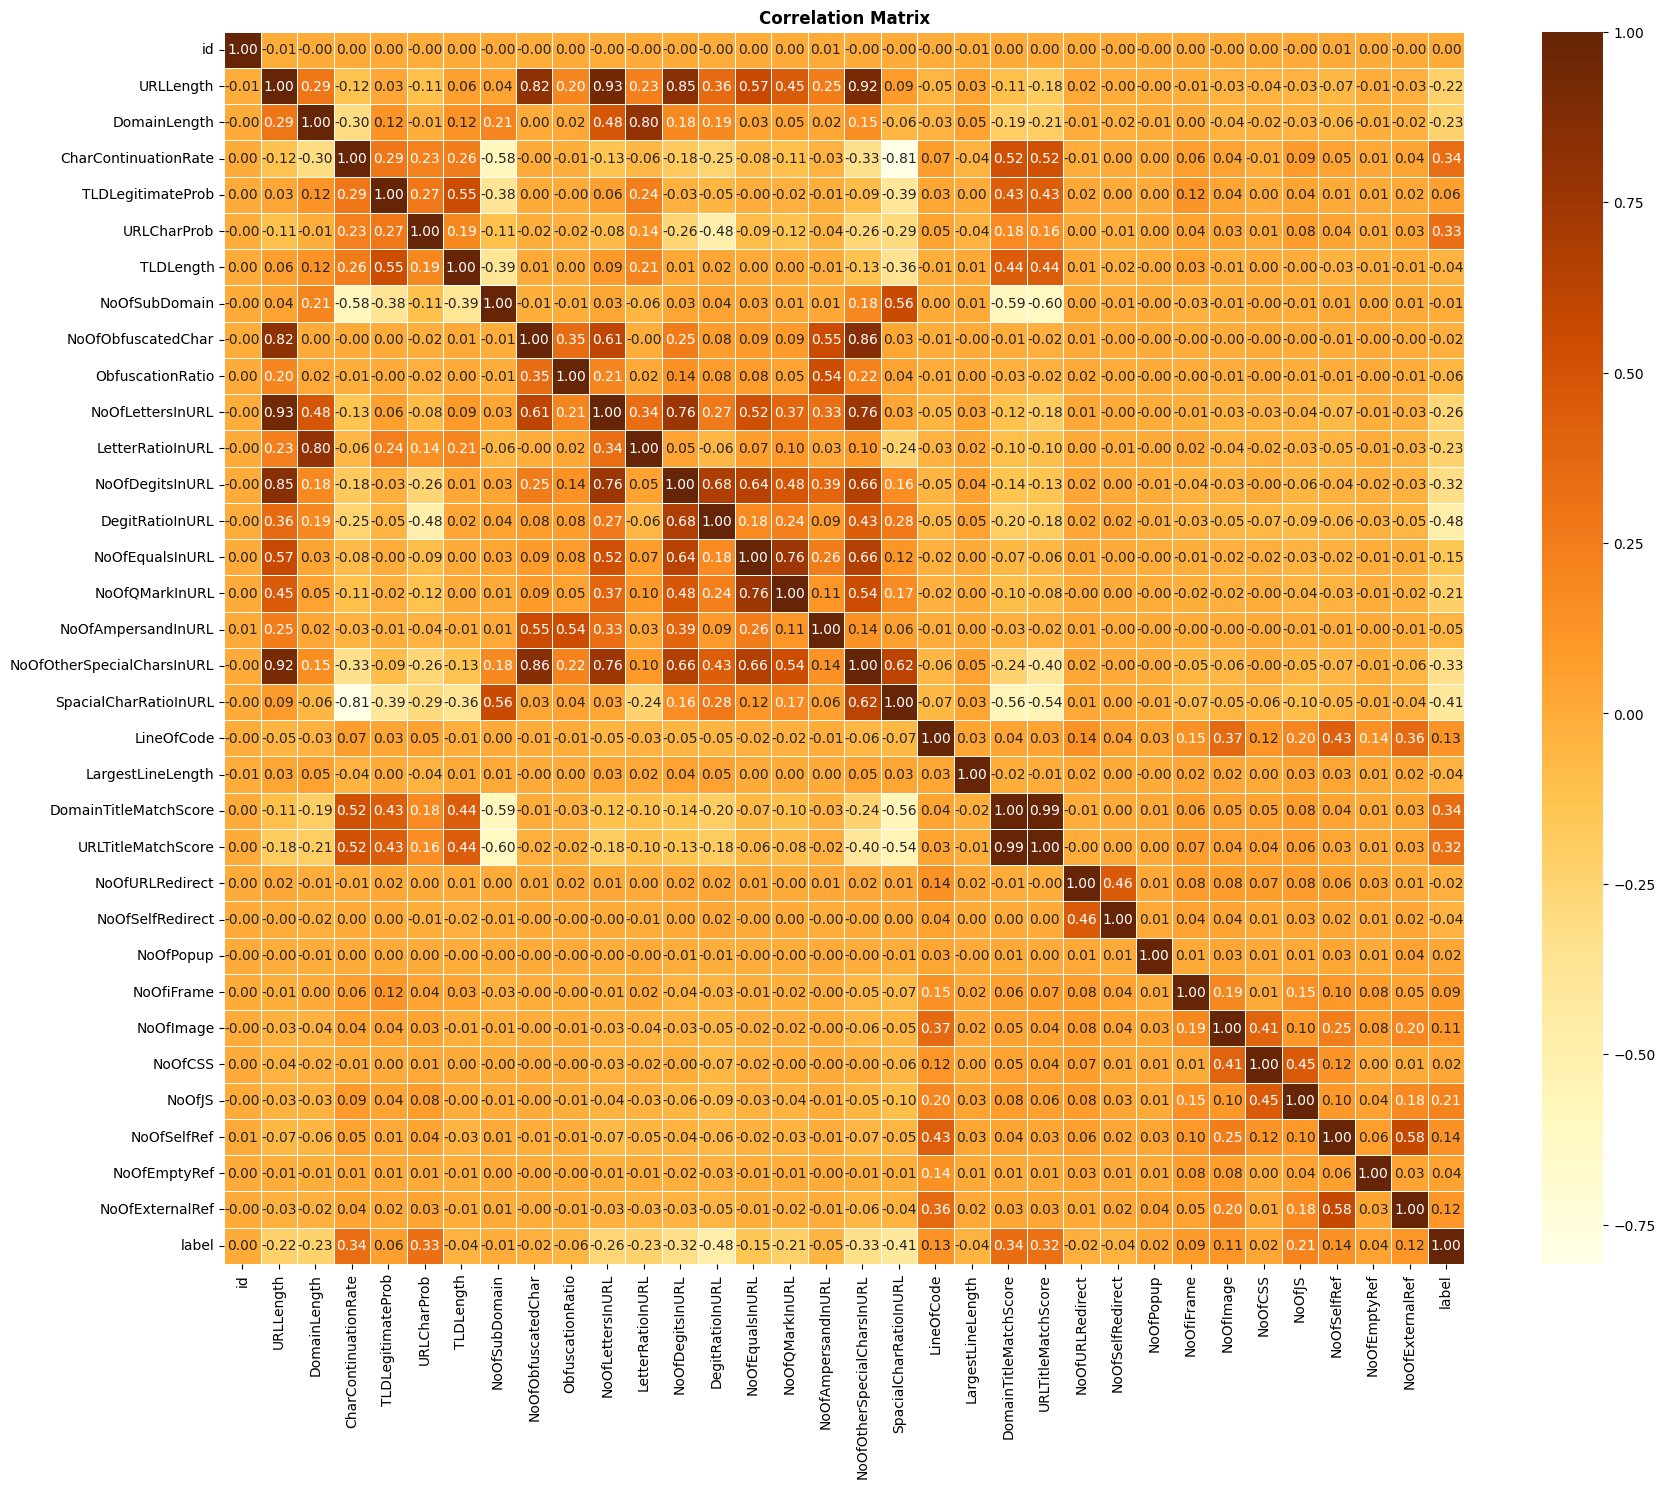

In [20]:
corr = num_categories.corr(method='pearson')
fig
plt.figure(figsize=(20,16))
sns.heatmap(corr,annot=True,fmt=".2f",linewidths=.5,cmap='YlOrBr')
plt.title('Correlation Matrix',weight='bold')
plt.show()

#### 2. Distribution
note: we are not plot all of the data and only take half from all of the data. <br>
this action is to reduce computational works

In [21]:
df.columns

Index(['id', 'FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength',
       'IsDomainIP', 'TLD', 'CharContinuationRate', 'TLDLegitimateProb',
       'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation',
       'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL',
       'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL',
       'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL',
       'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS',
       'LineOfCode', 'LargestLineLength', 'HasTitle', 'Title',
       'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots',
       'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription',
       'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet',
       'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay',
       'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS',
       'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'label'],

In [22]:
# Plot only sample
# to reduce computational works
df_plot = df.sample(n=int(len(df)/2),random_state=42)

In [23]:
# Function to plot distribution

def plot_distribution(data,label='label',type='categorical'):
    '''
    Plot all numerical features: either categorical or continuous by label

    data    : dataframe
    label   : label column
    '''
    if type =='categorical':
        features = data.select_dtypes(include=['object','bool']).columns
    elif type == 'continuous':
        features = data.select_dtypes(include=['number']).columns


    n_cols = 4
    n_rows = int(np.ceil(len(features)/n_cols))

    fig,axs = plt.subplots(n_rows,n_cols,figsize=(20,5 * n_rows))
    axs = axs.flatten()

    for i,col in enumerate(features):
        sns.histplot(data=data,x=col,hue = label,ax=axs[i])
        axs[i].set_title(f"Distribution of {col}")
        axs[i].set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()



##### 2.1. Distribution (Categorical)

In [24]:
categorical_features = [
    'IsDomainIP', 'HasObfuscation', 'IsHTTPS', 'HasTitle', 'HasFavicon',
    'HasDescription', 'HasPasswordField', 'HasExternalFormSubmit',
    'Bank', 'Pay', 'Crypto', 'HasSocialNet', 'Robots',
    'IsResponsive', 'label'
]

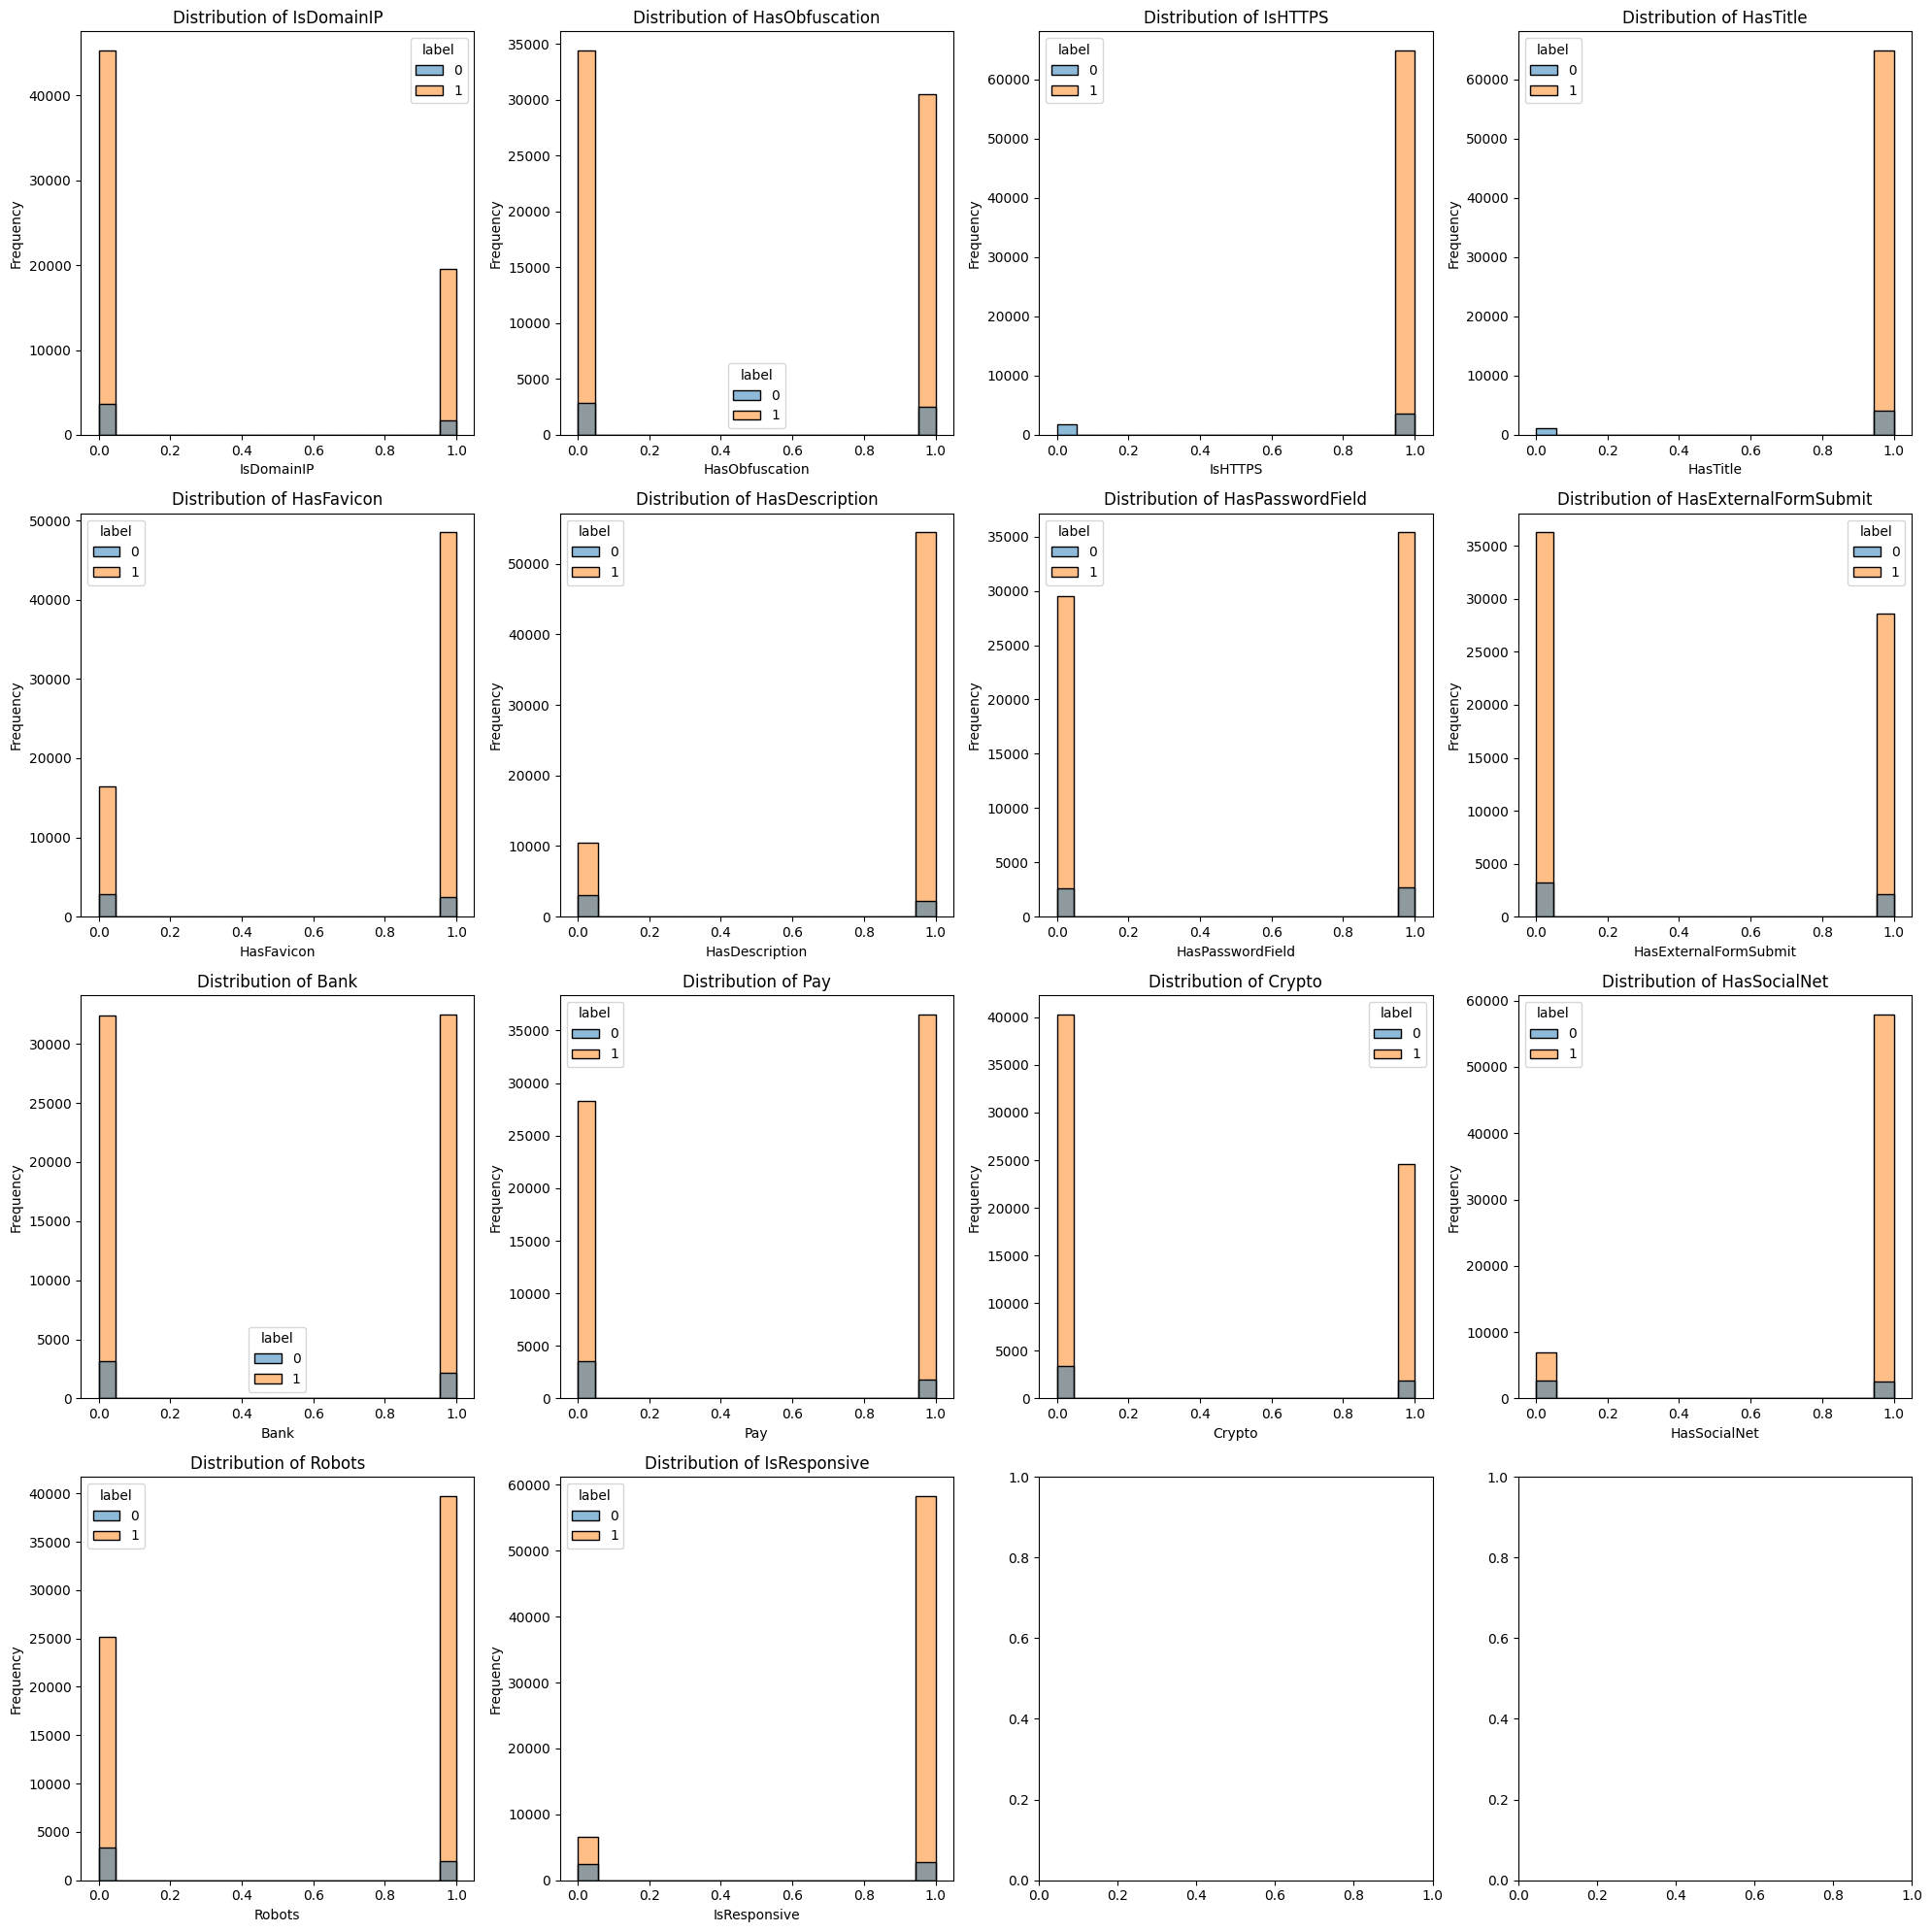

In [25]:
plot_distribution(df_plot[categorical_features],type='categorical')

##### 2.2. Distribution (Continuous)

In [26]:
continuous_features = [
    'URLLength', 'DomainLength', 'CharContinuationRate', 'TLDLegitimateProb',
    'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'NoOfObfuscatedChar',
    'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
    'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL',
    'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'LineOfCode',
    'LargestLineLength', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'NoOfPopup',
    'NoOfiFrame', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef',
    'NoOfExternalRef','label'
]

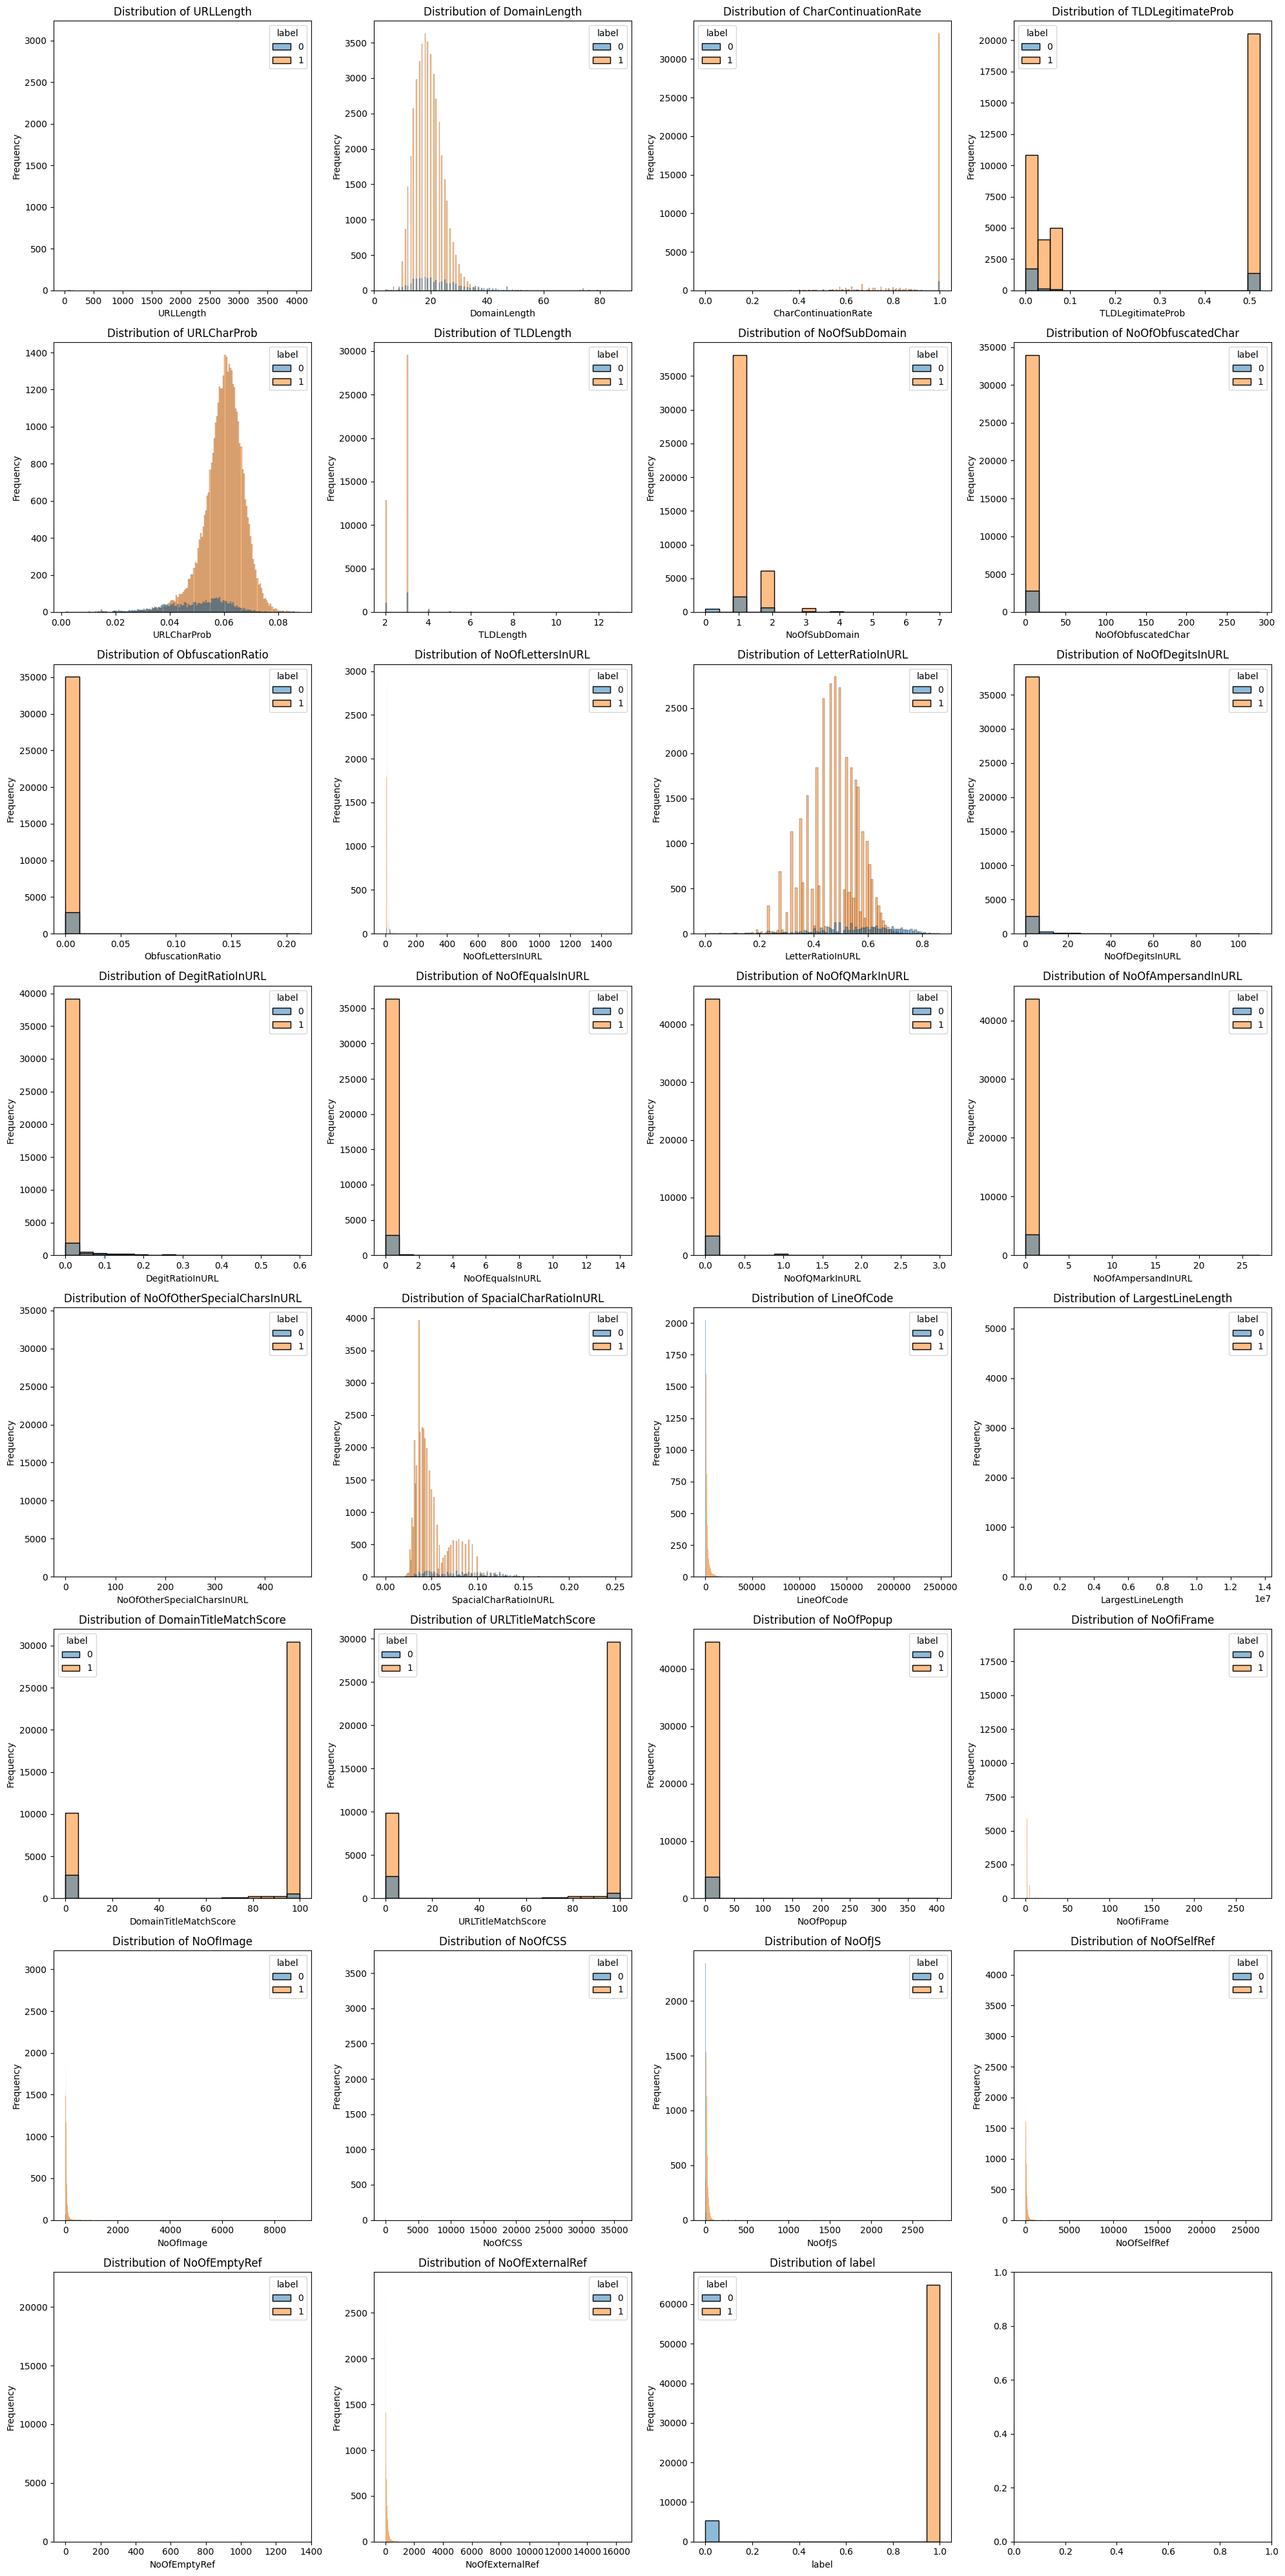

In [27]:
plot_distribution(df_plot[continuous_features],type='continuous')

#### 3. Visualization features and target

In [28]:
def plot_by_label(features,y='label'):
  '''
  Function to plot each features by target (label)

  features: features column
  y: label
  '''

  nrows = 3
  ncols = int(np.ceil(len(features) + 1)/ 2)

  fig,axs = plt.subplots(ncols=ncols,nrows=nrows,figsize=(10,5*nrows))

  axs = axs.flatten()
  pallete = sns.color_palette(palette="tab20b")
  for i,col in enumerate(features):
    sns.scatterplot(data = features,x=col,y=y,colormaps=pallete)

    plt.title(f"Features {col} by label")
    plt.tight_layout()
    plt.show()


In [29]:
df.columns

Index(['id', 'FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength',
       'IsDomainIP', 'TLD', 'CharContinuationRate', 'TLDLegitimateProb',
       'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation',
       'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL',
       'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL',
       'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL',
       'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS',
       'LineOfCode', 'LargestLineLength', 'HasTitle', 'Title',
       'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots',
       'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription',
       'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet',
       'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay',
       'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS',
       'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'label'],

In [30]:
features_to_plot = [
     'URLLength', 'DomainLength', 'IsDomainIP', 'CharContinuationRate', 'TLDLegitimateProb',
       'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation',
       'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL',
       'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL',
       'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL',
       'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS',
       'LineOfCode', 'LargestLineLength', 'HasTitle',
       'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots',
       'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription',
       'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet',
       'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay',
       'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS',
       'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef'
]

In [ ]:
plot_by_label(features= df_plot[features_to_plot])

#### 4. Explanation for feature distributions and correlations

## B. Data Insights

The objective of this section is for participants to understand how to formulate and get many insights from the given data so that we can improve the model performance. Given example questions:

1. How was the proportion between phishing and non-phishing URLs on security related features (`IsHTTPS` and `Robots`)?
2. Is there a significant correlation between the label of a URL (phishing or non-phishing) and its URL characteristics?
3. How does website-resource-related features vary across phishing and non-phishing URLs?

### Step 1

Answer the three example questions by visualizing and explaining the insights for each question. Add markdown texts to explain the visualizations.

#### 1. How was the proportion between phishing and non-phishing URLs on security related features (`IsHTTPS` and `Robots`)?

In [ ]:
# Write your code here

#### 2. Is there a significant correlation between the label of a URL (phishing or non-phishing) and its URL characteristics?

URL Characteristics:
- `URLLength`
- `Domain`
- `DomainLength`
- `IsDomainIP`
- `TLD`
- `TLDLength`
- `NoOfSubDomain`
- `HasObfuscation`
- `NoOfObfuscatedChar`
- `ObfuscationRatio`
- `NoOfLettersInURL`
- `LetterRatioInURL`
- `NoOfDegitsInURL`
- `DegitRatioInURL`
- `NoOfEqualsInURL`
- `NoOfQMarkInURL`
- `NoOfAmpersandInURL`
- `NoOfOtherSpecialCharsInURL`
- `SpacialCharRatioInURL`
- `CharContinuationRate`

In [ ]:
# Write your code here

#### 3. How does website-resource-related features vary across phishing and non-phishing URLs?

Website resource related features:
- `NoOfImage`
- `NoOfCSS`
- `NoOfJS`
- `NoOfSelfRef`
- `NoOfEmptyRef`
- `NoOfExternalRef`

In [ ]:
# Write your code here

### Step 2

Try to formulate three other new questions and answer them with the methods used before.

#### 4. Your first question (replace this heading)

In [ ]:
# Write your code here

#### 5. Your second question (replace this heading)

In [ ]:
# Write your code here

#### 6. Your third question (replace this heading)

In [ ]:
# Write your code here